In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4

In [4]:
insurance.describe()

X           Y
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Scatter Plot for insurance : 

In [5]:
sns.regplot?

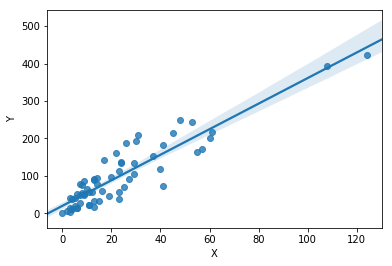

In [9]:
sns.regplot(x='X',y='Y',data=insurance)

This tutorial is broken down into five parts:

1) Calculate Mean and Variance.
2) Calculate Covariance.
3) Estimate Coefficients.
4) Make Predictions.
5) Predict Insurance.
These steps will give you the foundation you need to implement and train simple linear regression models for your own prediction problems.

## Calculate Mean and Variance 

In [6]:
# Estimate Mean and Variance
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values)/len(values)
# Calculate the variance of a list of numbers
def variance(values, mean):
    mean_of_square = sum([i*i for i in values])/len(values)
    return mean_of_square-(mean*mean)
 
# calculate mean and variance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=2.000
y stats: mean=2.800 variance=1.760


## Calculate CoVariance

In [16]:
import numpy as np
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    #E[xy]-E[x]E[y]
    #E[(X-E[X])(Y-E[Y00])]
    x = np.asarray(x)
    y = np.asarray(y)
    return np.mean(np.multiply((x-mean_x),(y-mean_y)))
    
 
# calculate covariance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))
#print(str(covar))

Covariance: 1.600


## Estimate Coefficients 

In [19]:
# Calculate coefficients
def coefficients(dataset):
    #TODO
    x = [i[0] for i in dataset]
    y = [i[1] for i in dataset]
    b1 = (covariance(x,mean(x),y,mean(y)))/(variance(x,mean_x))
    b0 = mean(y) - b1*mean(x)
    
    return b0,b1
 
# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))


Coefficients: B0=0.400, B1=0.800


## Make Predictions

We will also add in a function to manage the evaluation of the predictions called evaluate_algorithm() and another function to estimate the Root Mean Squared Error of the predictions called rmse_metric()

In [37]:
from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    square_error = [(predicted[i]-actual[i])**2 for i in range(len(actual))]
    root_square_error = (sum(square_error))
    rmse = sqrt((root_square_error)/len(actual))
    return rmse

In [38]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [39]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    #TODO
    b0,b1 = coefficients(train)
    predicted = [b0 + b1*x[0] for x in train]
    return predicted

In [40]:
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.7999999999999998, 4.3999999999999995]
RMSE: 0.693


## Now try on Insurance.csv

Change evaluate_algorithm(dataset, algorithm, split, *args) . In this function call train_test_split(dataset, split) . 

In [59]:
# Split a dataset into a train and test set
def train_test_split(dataset, split):
    from random import shuffle
    #TODO try without scikit-learn
    indices = [i for i in range(len(dataset))]
    shuffle(indices)
    train_size = int(split*len(dataset))
    indices_train = indices[:train_size]
    indices_test = indices[train_size:]
    train = [dataset[i] for i in indices_train]
    test = [dataset[i] for i in indices_test]
    return train,test

In [60]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [61]:
# evaluate algorithm
split = 0.7
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

RMSE: 1.359
